Text(0, 0.5, 'Value')

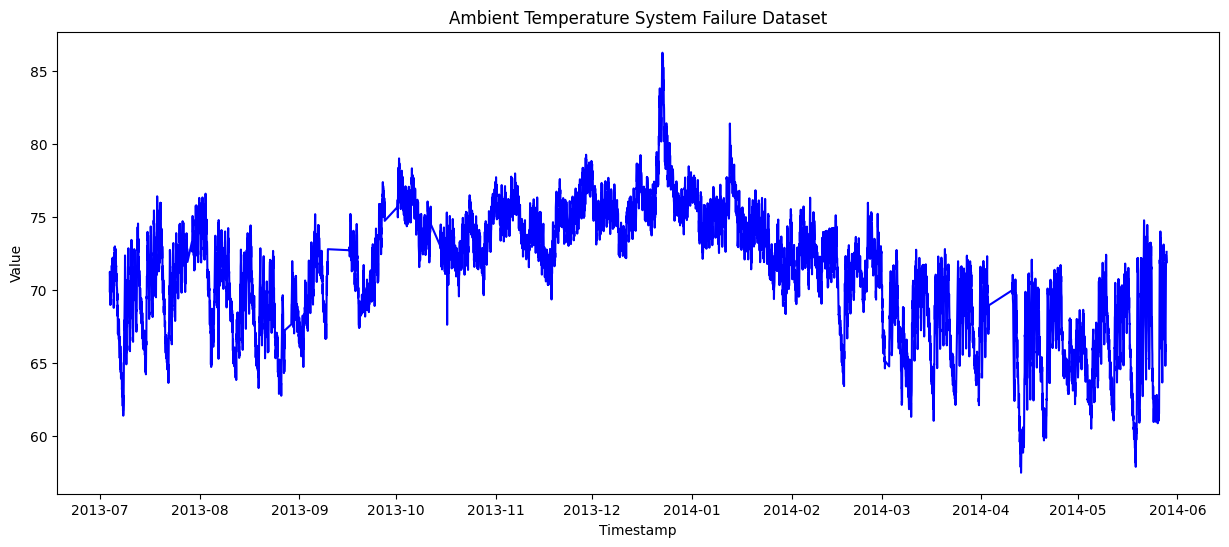

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the dataset
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
df = pd.read_csv(url)

# Preprocess the data
values = df['value'].values.astype(float)
values = np.reshape(values, (-1, 1))  # Reshape to fit the model input

# Normalize the data
scaler = StandardScaler()
scaled_values = scaler.fit_transform(values)

# timestamp -> datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['value'], color='blue')
plt.title('Ambient Temperature System Failure Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Value')

In [14]:

train_data, test_data = train_test_split(scaled_values, test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_dim = scaled_values.shape[1]
encoding_dim = 8  # Set the size of the encoded representations

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# Decoder
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim, activation='relu')(decoder)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(train_data, train_data,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(test_data, test_data))

# Make predictions on the test set
predictions = autoencoder.predict(test_data)

# Calculate reconstruction errors
mse = np.mean(np.power(test_data - predictions, 2), axis=1)

# Determine a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(mse, 95)

# Detect anomalies
anomalies = np.where(mse > threshold)[0]

# Output the indices of anomalies
print("Indices of anomalies:", anomalies)

Epoch 1/50
91/91 [==============================] - 2s 5ms/step - loss: 0.6616 - val_loss: 0.5312
Epoch 2/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 3/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 4/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 5/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 6/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 7/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 8/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 9/50
91/91 [==============================] - 0s 3ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 10/50
91/91 [==============================] - 0s 4ms/step - loss: 0.5786 - val_loss: 0.5309
Epoch 11/50
91/91 [

Anomalies indexes: [  56   91  125  138  214  245  259  269  285  299  300  322  350  373
  385  395  396  404  437  438  439  446  452  457  575  605  630  631
  635  640  682  702  704  707  727  732  755  760  786  798  799  803
  811  814  851  912  929  952  975  992 1030 1038 1055 1064 1067 1078
 1111 1112 1118 1126 1159 1180 1197 1221 1276 1281 1289 1304 1342 1386
 1404 1414 1419]
Anomalies amount: 73


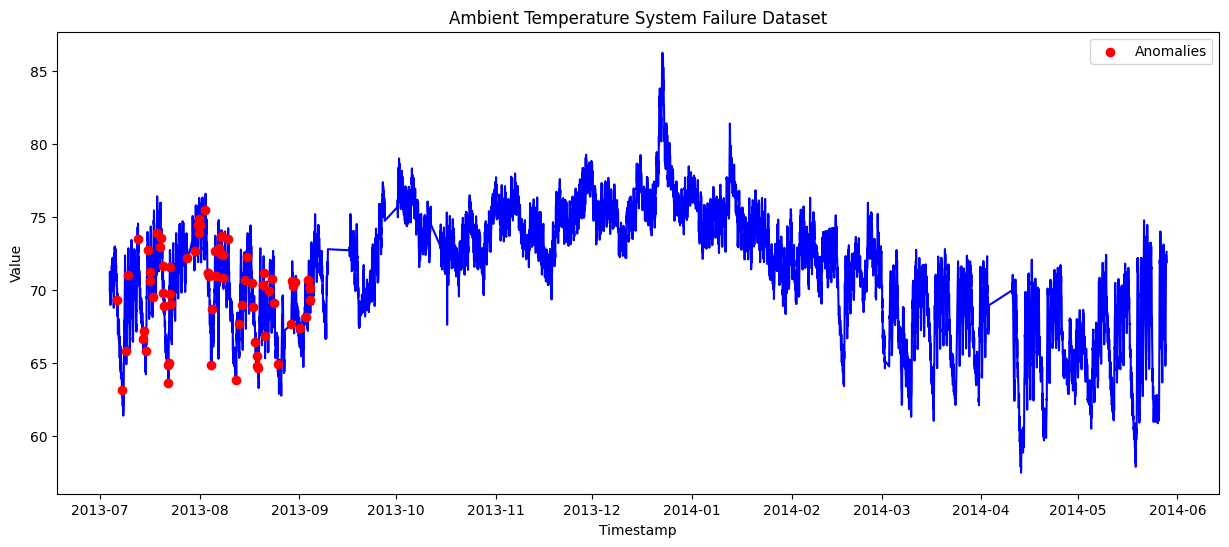

In [17]:
# Anoimalies showing
print("Anomalies indexes:", anomalies)
print("Anomalies amount:", len(anomalies))

plt.figure(figsize=(15, 6))
plt.plot(df['timestamp'], df['value'], color='blue')
plt.title('Ambient Temperature System Failure Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Value')

# Anomalies on the plot
anomaly_dates = df.loc[anomalies, 'timestamp']
anomaly_values = df.loc[anomalies, 'value']
plt.scatter(anomaly_dates, anomaly_values, color='red', marker='o', label='Anomalies', zorder=5)

# Showing the plot
plt.legend()
plt.show()